<a href="https://colab.research.google.com/github/aaruma/Intelligent-Systems/blob/main/Arjen_Arumalingam_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression with Standardized Data**

**Data prepration**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

m = -0.5
b = 0

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


**Mean And Standardization**

In [ ]:
# Midterm and Final marks from dataset
X = data["Midterm mark"]
Y = data["Final mark"]

mean_midterm = sum(X) / len(X)
print("Midterm Average: ", mean_midterm)
std_midterm = X.std()
print("Midterm Standard Deviation: ", std_midterm, "\n")

mean_final = sum(Y) / len(Y)
print("Final Average: ", mean_final)
std_final = Y.std()
print("Final Standard Deviation: ", std_final)

Midterm Average:  48.959
Midterm Standard Deviation:  9.746494785617061 

Final Average:  72.73500000000001
Final Standard Deviation:  16.658248631676365


Standardized Midterm:
 0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64 

Standardized Final:
 0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64


Text(0, 0.5, 'Standardized Final Marks')

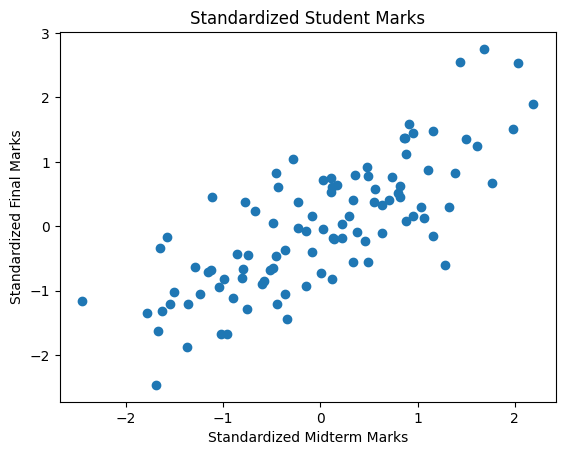

In [ ]:
standardize_midterm = (X - mean_midterm) / std_midterm
print("Standardized Midterm:\n", standardize_midterm, "\n")

standardize_final = (Y - mean_final) / std_final
print("Standardized Final:\n", standardize_final)

plt.scatter(standardize_midterm, standardize_final, label = "Data Points")
plt.title("Standardized Student Marks")
plt.xlabel("Standardized Midterm Marks")
plt.ylabel("Standardized Final Marks")

**Error Cost Function**

In [ ]:
def error_function(y_actual, y_current):
    difference = np.mean((y_actual - y_current) ** 2)
    return difference

y_actual = standardize_final
y_current = m * standardize_midterm + b

error_result = error_function(y_actual, y_current)
print("Error:", error_result, "\n")

Error: 2.0032433621324923 



**Gradient Partial Derivative**

In [ ]:
# Gradiant slope = dm
# Gradiant bias = db

dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))
print("Partial Derivative Slope:",dm, "\nPartial Derivative Bias:",db)

Partial Derivative Slope: -2.5214867242649848 
Partial Derivative Bias: 1.900701818158268e-15


**Updating slope and bias**

Updated Slope: -0.24785132757350153 
Updated Bias: -1.9007018181582682e-16


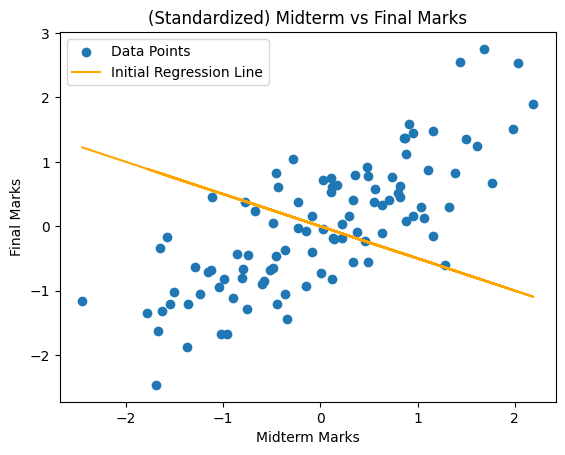

In [ ]:
alpha = 0.1
m = m - alpha * dm
b = b - alpha * db
print("Updated Slope:", m, "\nUpdated Bias:", b)

plt.scatter(standardize_midterm, standardize_final, label = "Data Points")
x1 = standardize_midterm
y1 = -0.5 * x1
plt.plot(x1, y1, color = 'orange', label = 'Initial Regression Line')

plt.title("(Standardized) Midterm vs Final Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

plt.show()

**Updating slope and bias (100 iterations)**

Updated slope:  0.773478143235186 
Updated bias:  -6.152856002472621e-16


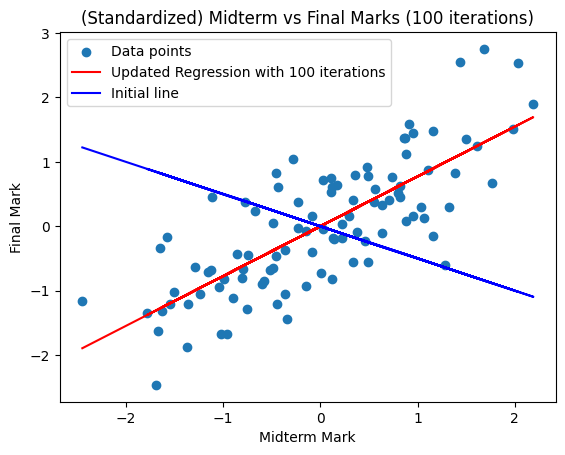

In [ ]:
iterations = 100
m = -0.5
b = 0

# The underscore means not interested in how many times the loop is run, but it should run some specific number of times overall.
for _ in range(iterations):
    y_current = m * standardize_midterm + b
    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))
    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(standardize_midterm, standardize_final, label = 'Data points')
x2 = standardize_midterm
y2 = m*x2 + b
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.plot(x2, y2, color = 'red', label = 'Updated Regression with 100 iterations')
plt.plot(standardize_midterm,(-0.5)*standardize_midterm + 0, '-b', label = 'Initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("(Standardized) Midterm vs Final Marks (100 iterations)")
plt.legend()
plt.show()



**Errors for 100 iterations**

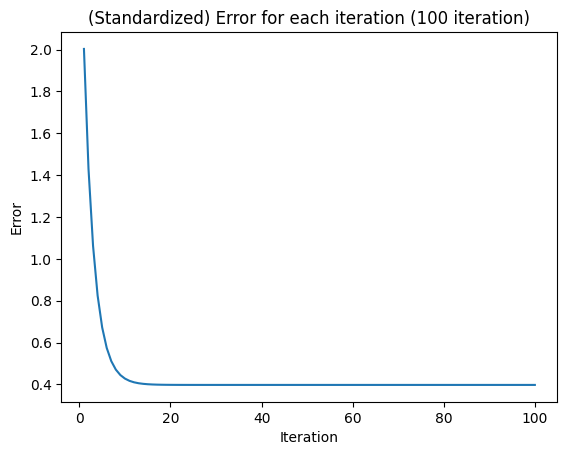

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * standardize_midterm + b

    bad = np.mean((y_current-standardize_final) ** 2)
    errors.append(bad)

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Standardized) Error for each iteration (100 iteration)')
plt.show()

**Updating slope and bias (2000 iterations)**

Updated slope:  0.7734781435681736 
Updated bias:  -6.117328865684621e-16


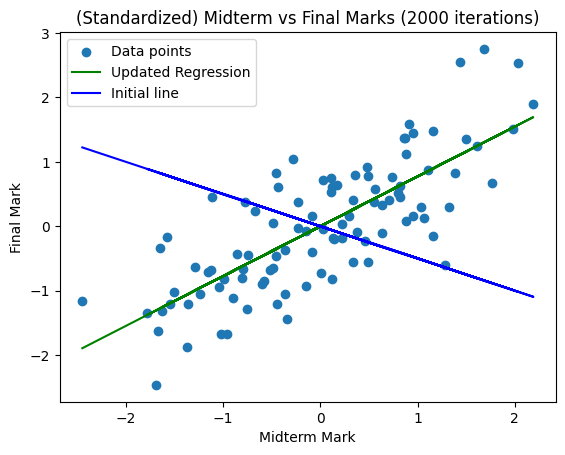

In [ ]:
iterations = 2000
m = -0.5
b = 0

for _ in range(iterations):
    y_current = m * standardize_midterm + b

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(standardize_midterm, standardize_final, label = 'Data points')
x3 = standardize_midterm
y3 = m * x3 + b

plt.plot(x3, y3, color = 'green', label = 'Updated Regression')
plt.plot(standardize_midterm,(-0.5)*standardize_midterm + 0, '-b', label = 'Initial line')
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("(Standardized) Midterm vs Final Marks (2000 iterations)")
plt.legend()
plt.show()


**Error for 2000 iterations**

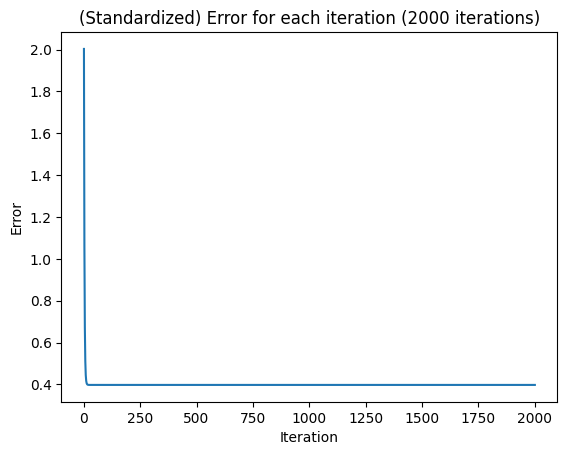

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * standardize_midterm + b

    bad = np.mean((y_current-standardize_final) ** 2)
    errors.append(bad)

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Standardized) Error for each iteration (2000 iterations)')
plt.show()


### **Linear Regression without Standardized Data**

**Data prepration**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

m = -0.5
b = 0
alpha = 0.0001

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


**Mean And Standardization**

Midterm Average:  48.959
Midterm Standard Deviation:  9.746494785617061 

Final Average:  72.73500000000001
Final Standard Deviation:  16.658248631676365


Text(0, 0.5, 'Final Marks')

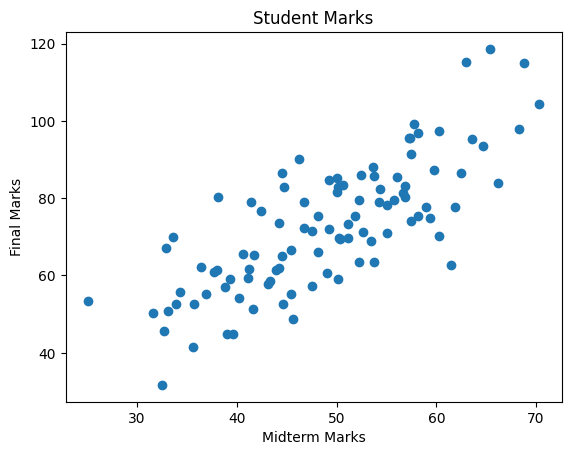

In [ ]:
# Midterm and Final marks from dataset
X = data["Midterm mark"]
Y = data["Final mark"]

mean_midterm = sum(X) / len(X)
print("Midterm Average: ", mean_midterm)
# std_midterm = X.std()
std_midterm = X.std()
print("Midterm Standard Deviation: ", std_midterm, "\n")

mean_final = sum(Y) / len(Y)
print("Final Average: ", mean_final)
std_final = Y.std()
print("Final Standard Deviation: ", std_final)

plt.scatter(X, Y, label = "Data Points")
plt.title("Student Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")

In [ ]:
standardize_midterm = (X - mean_midterm) / std_midterm
# print("Standardized Midterm:\n", standardize_midterm, "\n")

standardize_final = (Y - mean_final) / std_final
#  print("Standardized Final:\n", standardize_final)

**Error Cost Function**

In [ ]:
def error_function(y_actual, y_current):
    difference = np.mean((y_actual - y_current) ** 2)
    return difference

y_actual = Y
y_current = m * X + b

error_result = error_function(y_actual, y_current)
print("Error:", error_result, "\n")

Error: 9873.218075 



**Gradient Partial Derivative**

In [ ]:
# Gradiant slope = dm
# Gradiant bias = db

dm = (2 / len(X)) * np.sum((y_current - Y) * X)
db = (2 / len(X)) * np.sum((y_current - Y))
print("Partial Derivative Slope:",dm, "\nPartial Derivative Bias:",db)

Partial Derivative Slope: -9861.7451 
Partial Derivative Bias: -194.42900000000003


**Updating slope and bias (100 iterations)**

Updated slope:  1.4785727560143909 
Updated bias:  0.04490536397288713


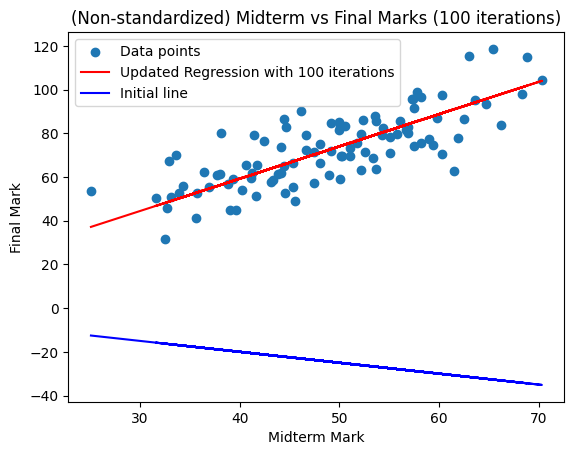

In [ ]:
iterations = 100
m = -0.5
b = 0

# The underscore means not interested in how many times the loop is run, but it should run some specific number of times overall.
for _ in range(iterations):
    y_current = m * X + b
    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))
    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(X, Y, label = 'Data points')
# x2 = np.linspace(min(X), max(Y), 100)
x2 = data["Midterm mark"]
y2 = m*x2 + b
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.plot(x2, y2, color = 'red', label = 'Updated Regression with 100 iterations')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'Initial line')
plt.title("(Non-standardized) Midterm vs Final Marks (100 iterations)")
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.legend()
plt.show()



**Errors for 100 iterations**

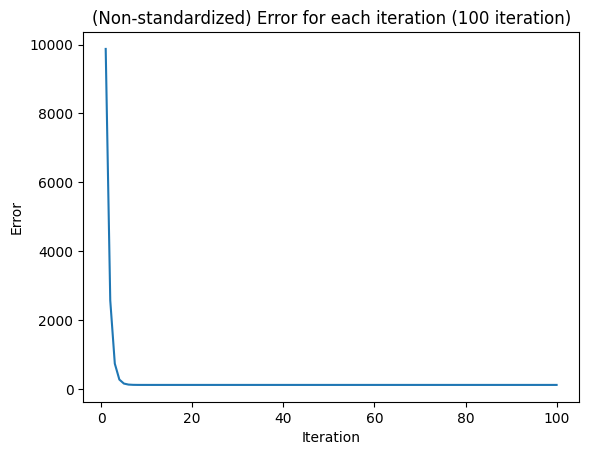

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * X + b

    bad = np.mean((y_current-Y) ** 2)
    errors.append(bad)

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Non-standardized) Error for each iteration (100 iteration)')
plt.show()

**Updating slope and bias (2000 iterations)**

Updated slope:  1.4763433036607632 
Updated bias:  0.1583379070844271


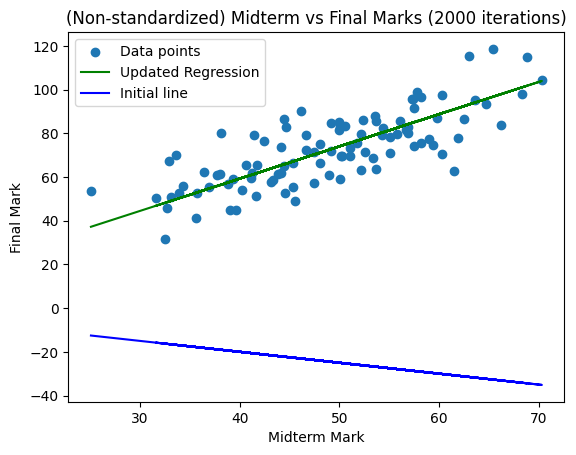

In [ ]:
iterations = 2000
m = -0.5
b = 0

for _ in range(iterations):
    y_current = m * X + b

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(X, Y, label = 'Data points')
x3 = data["Midterm mark"]
y3 = m * x3 + b

plt.plot(x3, y3, color = 'green', label = 'Updated Regression')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'Initial line')
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.title("(Non-standardized) Midterm vs Final Marks (2000 iterations)")
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.legend()
plt.show()


**Error for 2000 iterations**

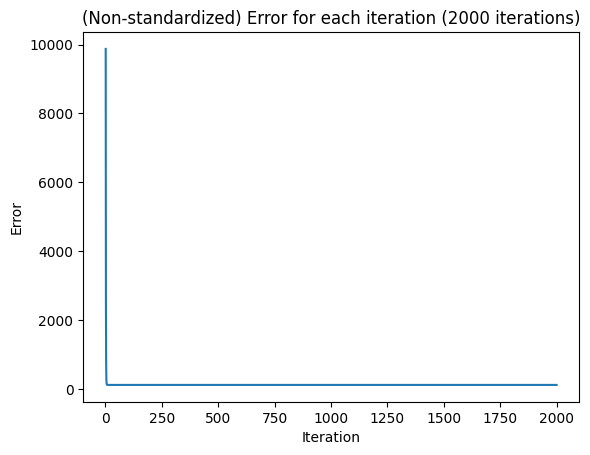

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * X + b

    bad = np.mean((y_current-Y) ** 2)
    errors.append(bad)

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Non-standardized) Error for each iteration (2000 iterations)')
plt.show()


### **Verifying with Python API**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

# Midterm and Final marks from dataset
X = data[["Midterm mark"]].values.reshape(-1,1)
Y = data["Final mark"]

mean_midterm = sum(X) / len(X)
print("Midterm Average: ", mean_midterm)
std_midterm = X.std()
print("Midterm Standard Deviation: ", std_midterm, "\n")

mean_final = sum(Y) / len(Y)
print("Final Average: ", mean_final)
std_final = Y.std()
print("Final Standard Deviation: ", std_final)

standardize_midterm = (X - mean_midterm) / std_midterm
print("Standardized Midterm:\n", standardize_midterm, "\n")

standardize_final = (Y - mean_final) / std_final
print("Standardized Final:\n", standardize_final)

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]
Midterm Average:  [48.959]
Midterm Standard Deviation:  9.697639867514155 

Final Average:  72.73500000000001
Final Standard Deviation:  16.658248631676365
Standardized Midterm:
 [[-1.69721708]
 [ 0.45794648]
 [ 1.29320125]
 [-0.15044898]
 [ 1.11790087]
 [ 0.63324686]
 [ 0.33420503]
 [-0.99601554]
 [-0.08857825]
 [ 0.37545218]
 [-0.36699651]
 [ 0.56106435]
 [-0.49073796]
 [ 0.95291227]
 [ 0.79823546]
 [ 0.00422783]
 [-0.43917902]
 [ 1.1694598 ]
 [-0.34637294]
 [-1.04757448]
 [ 1.77785526]
 [ 1.69536096]
 [-0.15044898]
 [-0.75884443]
 [ 0.29295788]
 [ 1.07665372]
 [ 0.86010618]
 [ 1.50974878]
 [-0.23294328]
 [ 0.16921643]

In [ ]:
std_regression = LinearRegression()
#  Normal regression = Not Standardized
normal_regression = LinearRegression()

std_regression.fit(standardize_midterm, standardize_final)
normal_regression.fit(X, Y)

std_m = std_regression.coef_[0]
std_b = std_regression.intercept_

normal_m = normal_regression.coef_[0]
normal_b = normal_regression.intercept_

print("\nSlope and bias for standardized data:\nm = ", std_m, ", b = ", std_b)
print("\nSlope and bias for non-standardized data:\nm = ", normal_m, ", b = ", normal_b)


Slope and bias for standardized data:
m =  0.7696010357268837 , b =  -6.340916049338096e-16

Slope and bias for non-standardized data:
m =  1.321992317252377 , b =  8.01157813964086


# **Post Lab Questions**

*1. Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.*

The data provided cannot be utlized for the learning rate of 0.1 since the formula cannot jump above the minimum learning rate of 0.0001 which is why there are alot of errors produced. However, the standardized data provides accuracy as shown from the error plots with a minimum learning rate of 0.0001 (as shown below).

*2. Investigate the effect of standardization.*

Standardization converts data into smaller amounts providing a faster runtime for linear regression. However with a small learning rate, there will be multiple repetitions to produce a proper regression.

### **Linear Regression with Standardized Data (Learning Rate Alpha = 0.1)**

**Data prepration**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

m = -0.5
b = 0
alpha = 0.1

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


**Mean And Standardization**

In [ ]:
# Midterm and Final marks from dataset
X = data["Midterm mark"]
Y = data["Final mark"]

mean_midterm = sum(X) / len(X)
# print("Midterm Average: ", mean_midterm)
std_midterm = X.std()
# print("Midterm Standard Deviation: ", std_midterm, "\n")

mean_final = sum(Y) / len(Y)
print("Final Average: ", mean_final)
std_final = Y.std()
# print("Final Standard Deviation: ", std_final)


Final Average:  72.73500000000001


In [ ]:
standardize_midterm = (X - mean_midterm) / std_midterm
# print("Standardized Midterm:\n", standardize_midterm, "\n")

standardize_final = (Y - mean_final) / std_final
# print("Standardized Final:\n", standardize_final)

**Error Cost Function**

In [ ]:
def error_function(y_actual, y_current):
    difference = np.mean((y_actual - y_current) ** 2)
    return difference

y_actual = standardize_final
y_current = m * standardize_midterm + b

error_result = error_function(y_actual, y_current)
#print("Error:", error_result, "\n")

**Gradient Partial Derivative**

In [ ]:
# Gradiant slope = dm
# Gradiant bias = db

dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))
# print("Partial Derivative Slope:",dm, "\nPartial Derivative Bias:",db)

**Updating slope and bias**

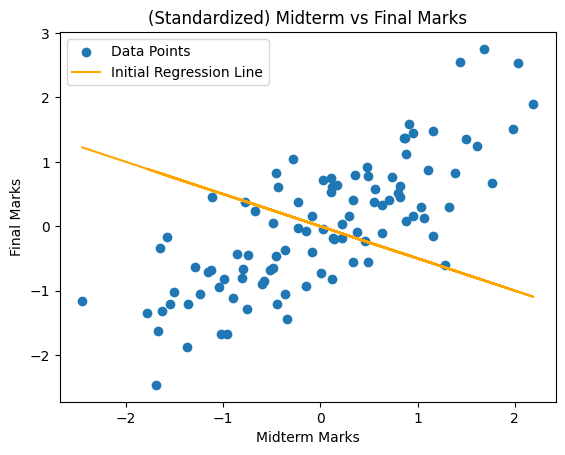

In [ ]:
m = m - alpha * dm
b = b - alpha * db
# print("Updated Slope:", m, "\nUpdated Bias:", b)

plt.scatter(standardize_midterm, standardize_final, label = "Data Points")
x1 = standardize_midterm
y1 = -0.5 * x1
plt.plot(x1, y1, color = 'orange', label = 'Initial Regression Line')

plt.title("(Standardized) Midterm vs Final Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

plt.show()

**Updating slope and bias (100 iterations)**

Updated slope:  0.773478143235186 
Updated bias:  -6.152856002472621e-16


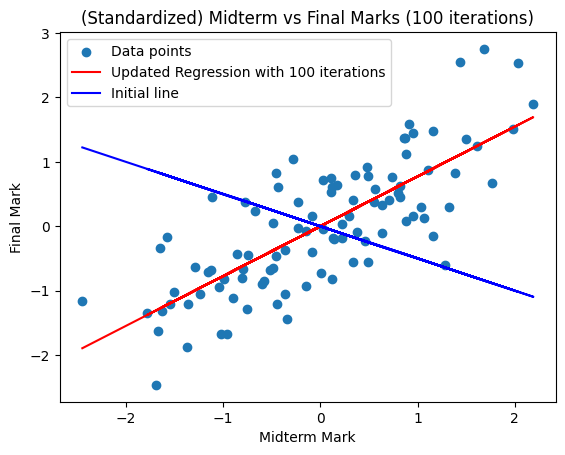

In [ ]:
iterations = 100
m = -0.5
b = 0

# The underscore means not interested in how many times the loop is run, but it should run some specific number of times overall.
for _ in range(iterations):
    y_current = m * standardize_midterm + b
    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))
    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(standardize_midterm, standardize_final, label = 'Data points')
x2 = standardize_midterm
y2 = m*x2 + b
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.plot(x2, y2, color = 'red', label = 'Updated Regression with 100 iterations')
plt.plot(standardize_midterm,(-0.5)*standardize_midterm + 0, '-b', label = 'Initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("(Standardized) Midterm vs Final Marks (100 iterations)")
plt.legend()
plt.show()



**Errors for 100 iterations**

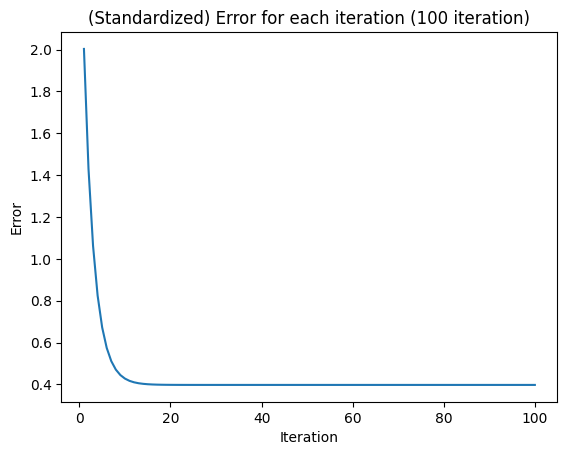

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * standardize_midterm + b

    bad = np.mean((y_current-standardize_final) ** 2)
    errors.append(bad)

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Standardized) Error for each iteration (100 iteration)')
plt.show()

**Updating slope and bias (2000 iterations)**

In [ ]:
iterations = 2000
m = -0.5
b = 0

for _ in range(iterations):
    y_current = m * standardize_midterm + b

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(standardize_midterm, standardize_final, label = 'Data points')
x3 = standardize_midterm
y3 = m * x3 + b

plt.plot(x3, y3, color = 'green', label = 'Updated Regression')
plt.plot(standardize_midterm,(-0.5)*standardize_midterm + 0, '-b', label = 'Initial line')
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("(Standardized) Midterm vs Final Marks (2000 iterations)")
plt.legend()
plt.show()


**Error for 2000 iterations**

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * standardize_midterm + b

    bad = np.mean((y_current-standardize_final) ** 2)
    errors.append(bad)

    dm = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final) * standardize_midterm)
    db = (2 / len(standardize_midterm)) * np.sum((y_current - standardize_final))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Standardized) Error for each iteration (2000 iterations)')
plt.show()


### **Linear Regression without Standardized Data (Learning Rate alpha = 0.1)**

**Data prepration**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

m = -0.5
b = 0
alpha = 0.1

**Mean And Standardization**

In [ ]:
# Midterm and Final marks from dataset
X = data["Midterm mark"]
Y = data["Final mark"]

mean_midterm = sum(X) / len(X)
print("Midterm Average: ", mean_midterm)
std_midterm = X.std()
print("Midterm Standard Deviation: ", std_midterm, "\n")

mean_final = sum(Y) / len(Y)
print("Final Average: ", mean_final)
std_final = Y.std()
print("Final Standard Deviation: ", std_final)

In [ ]:
standardize_midterm = (X - mean_midterm) / std_midterm
# print("Standardized Midterm:\n", standardize_midterm, "\n")

standardize_final = (Y - mean_final) / std_final
#  print("Standardized Final:\n", standardize_final)

**Error Cost Function**

In [ ]:
def error_function(y_actual, y_current):
    difference = np.mean((y_actual - y_current) ** 2)
    return difference

y_actual = Y
y_current = m * X + b

error_result = error_function(y_actual, y_current)
print("Error:", error_result, "\n")

**Gradient Partial Derivative**

In [ ]:
# Gradiant slope = dm
# Gradiant bias = db

dm = (2 / len(X)) * np.sum((y_current - Y) * X)
db = (2 / len(X)) * np.sum((y_current - Y))
print("Partial Derivative Slope:",dm, "\nPartial Derivative Bias:",db)

**Updating slope and bias (100 iterations)**

In [ ]:
iterations = 100
m = -0.5
b = 0

# The underscore means not interested in how many times the loop is run, but it should run some specific number of times overall.
for _ in range(iterations):
    y_current = m * X + b
    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))
    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(X, Y, label = 'Data points')
# x2 = np.linspace(min(X), max(Y), 100)
x2 = data["Midterm mark"]
y2 = m*x2 + b
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.plot(x2, y2, color = 'red', label = 'Updated Regression with 100 iterations')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'Initial line')
plt.title("(Non-Standardized) Midterm vs Final Marks (100 iterations)")
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.legend()
plt.show()



**Errors for 100 iterations**

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * X + b

    bad = np.mean((y_current-Y) ** 2)
    errors.append(bad)

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Non-Standardized) Error for each iteration (100 iteration)')
plt.show()

**Updating slope and bias (2000 iterations)**

<ipython-input-80-721f9e73066c>:11: RuntimeWarning: invalid value encountered in double_scalars
  m = m - alpha * dm
<ipython-input-80-721f9e73066c>:12: RuntimeWarning: invalid value encountered in double_scalars
  b = b - alpha * db


Updated slope:  nan 
Updated bias:  nan


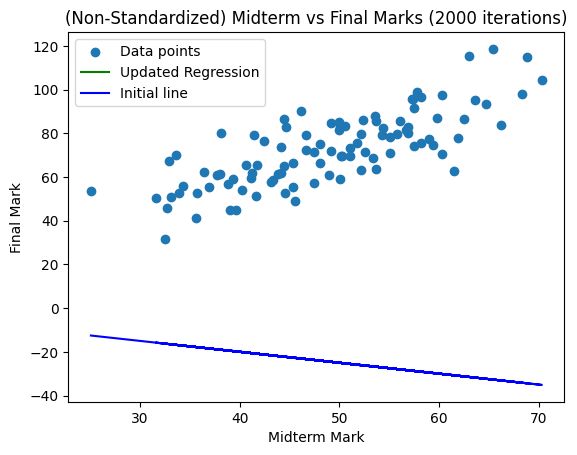

In [ ]:
iterations = 2000
m = -0.5
b = 0

for _ in range(iterations):
    y_current = m * X + b

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(X, Y, label = 'Data points')
x3 = data["Midterm mark"]
y3 = m * x3 + b

plt.plot(x3, y3, color = 'green', label = 'Updated Regression')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'Initial line')
print("Updated slope: ", m, "\nUpdated bias: ", b)
plt.title("(Non-Standardized) Midterm vs Final Marks (2000 iterations)")
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.legend()
plt.show()


**Error for 2000 iterations**

<ipython-input-81-b4c8322b8ceb>:14: RuntimeWarning: invalid value encountered in double_scalars
  m = m - alpha * dm
<ipython-input-81-b4c8322b8ceb>:15: RuntimeWarning: invalid value encountered in double_scalars
  b = b - alpha * db


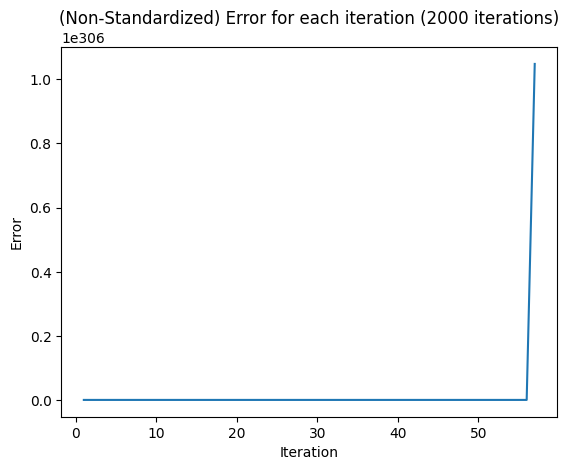

In [ ]:
errors = []
m = -0.5
b = 0

for num in range(iterations):
    y_current = m * X + b

    bad = np.mean((y_current-Y) ** 2)
    errors.append(bad)

    dm = (2 / len(X)) * np.sum((y_current - Y) * X)
    db = (2 / len(X)) * np.sum((y_current - Y))

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('(Non-Standardized) Error for each iteration (2000 iterations)')
plt.show()
